#### Importamos librerias a utilizar

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos Data a consumir

In [3]:
hechos = pd.read_csv('../Datasets/hechos.csv')
victimas = pd.read_csv('../Datasets/victimas.csv')

In [4]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             696 non-null    object 
 1   N_VICTIMAS     696 non-null    int64  
 2   FECHA          696 non-null    object 
 3   AAAA           696 non-null    int64  
 4   MM             696 non-null    int64  
 5   HH             696 non-null    object 
 6   TIPO_DE_CALLE  696 non-null    object 
 7   COMUNA         696 non-null    int64  
 8   pos x          684 non-null    float64
 9   pos y          684 non-null    float64
 10  VICTIMA        696 non-null    object 
 11  ACUSADO        696 non-null    object 
 12  FATAL          696 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 70.8+ KB


In [5]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   ROL                  717 non-null    object
 2   SEXO                 717 non-null    object
 3   EDAD                 717 non-null    object
 4   FECHA_FALLECIMIENTO  717 non-null    object
 5   FATAL                717 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 33.7+ KB


In [8]:
len(hechos['ID'].unique())

696

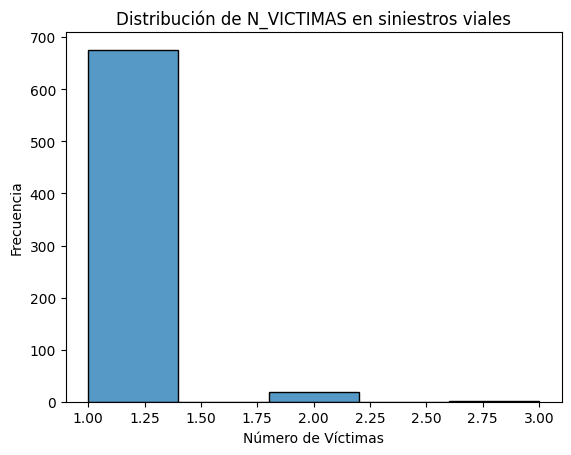

In [13]:
sns.histplot(hechos['N_VICTIMAS'], bins=5)
plt.title('Distribución de N_VICTIMAS en siniestros viales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

vemos claramente que en mayor porcentaje de siniestros tienen 1 victima

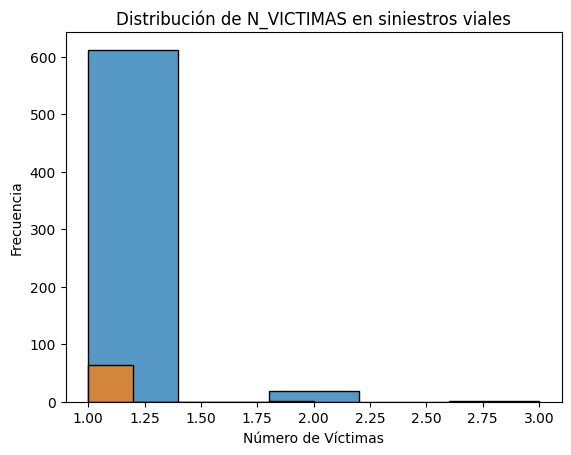

In [16]:
sns.histplot(hechos[hechos['FATAL']>0]['N_VICTIMAS'], bins=5)
sns.histplot(hechos[hechos['FATAL']==0]['N_VICTIMAS'], bins=5)
plt.title('Distribución de N_VICTIMAS en siniestros viales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

las victimas que sobrevivieron al siniestro es mucho menor a las fatales

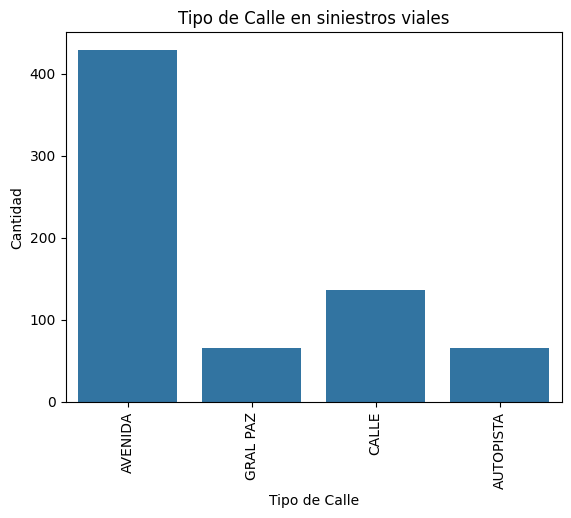

In [29]:
sns.countplot(x='TIPO_DE_CALLE', data=hechos)
plt.xticks(rotation=90)
plt.title('Tipo de Calle en siniestros viales')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.show()

en el tipo de calle AVENIDA tenemos mayor ocurrencia de siniestros

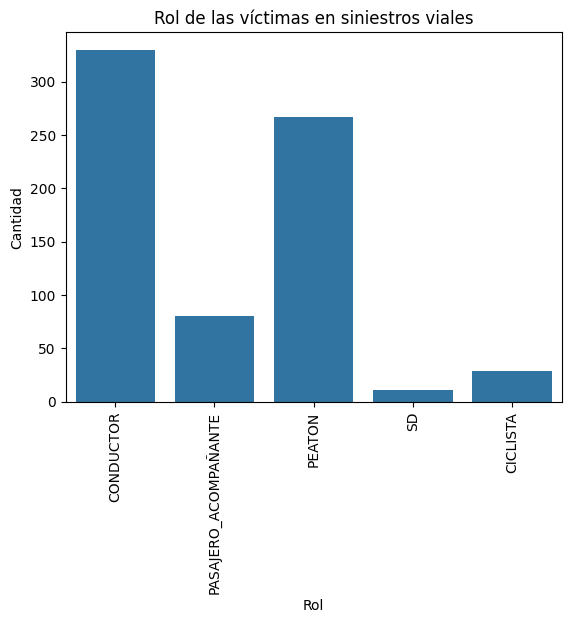

In [31]:
sns.countplot(x='ROL', data=victimas)
plt.xticks(rotation=90)
plt.title('Rol de las víctimas en siniestros viales')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.show()

los mas afectados serian tanto conductor como peaton

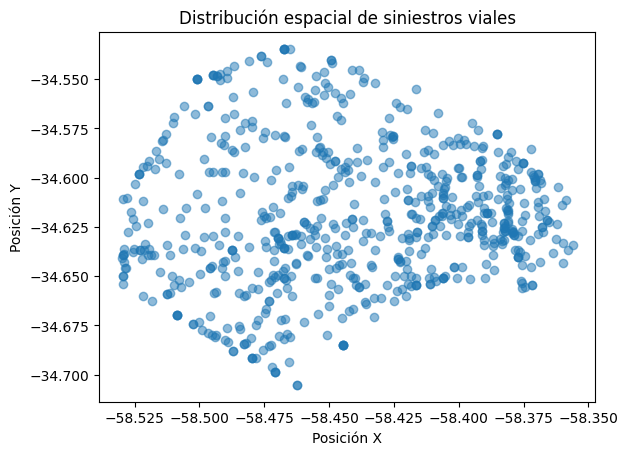

In [32]:
plt.scatter(hechos['pos x'], hechos['pos y'], alpha=0.5)
plt.title('Distribución espacial de siniestros viales')
plt.xlabel('Posición X')
plt.ylabel('Posición Y')
plt.show()

podemos identificar los puntos con mayor afluencia de siniestros

In [37]:
hechos['FECHA'] = pd.to_datetime(hechos['FECHA'])
hechos['Tasa Homicidios'] = hechos.groupby(hechos['FECHA'].dt.year)['FATAL'].transform('mean') * 100

In [38]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO,FATAL,Tasa Homicidios
0,2016-0001,1,2016-01-01,2016,1,4,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO,1,58.333333
1,2016-0002,1,2016-01-02,2016,1,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS,1,58.333333
2,2016-0003,1,2016-01-03,2016,1,7,AVENIDA,1,-58.390403,-34.631894,MOTO,AUTO,1,58.333333
3,2016-0004,1,2016-01-10,2016,1,0,AVENIDA,8,-58.465039,-34.680930,MOTO,SD,0,58.333333
4,2016-0005,1,2016-01-21,2016,1,5,AVENIDA,1,-58.387183,-34.622466,MOTO,PASAJEROS,1,58.333333


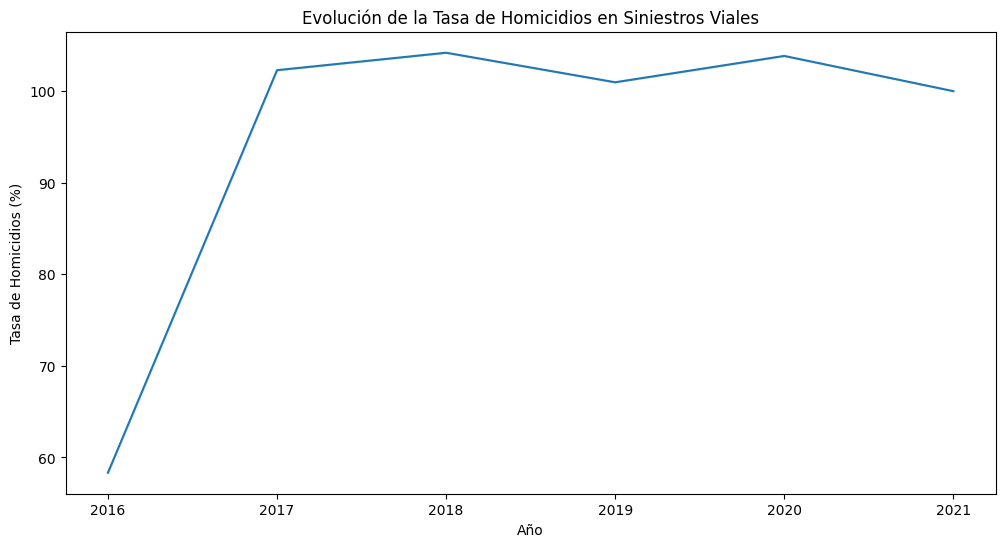

In [40]:
# Línea de tiempo de la tasa de homicidios en siniestros viales
plt.figure(figsize=(12, 6))
sns.lineplot(x=hechos['FECHA'].dt.year, y=hechos['Tasa Homicidios'])
plt.title('Evolución de la Tasa de Homicidios en Siniestros Viales')
plt.xlabel('Año')
plt.ylabel('Tasa de Homicidios (%)')
plt.show()